# <font color=darkcyan> K-means algorithm</font>

In [ ]:
# ignore warnings for better clarity (may not be the best thing to do)...
import warnings
warnings.filterwarnings('ignore')

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

The K-means algorithm is a procedure which aims at partitioning a data set into $K$ distinct, non-overlapping clusters.
Consider $n\geqslant 1$ observations $(X_{1},\ldots,X_{n})$ taking values in $\mathbb{R}^p$.
The $K$-means algorithm seeks to minimize over all partitions $C = (C_{1},\ldots,C_{K})$ of $\{1,\ldots,n\}$ the following criterion
$$
\textrm{crit}(C)=\sum_{k=1}^K{1\over |C_{k}|}\sum_{a,b\in C_{k}} \|X_{a}-X_{b}\|^2\,,
$$
where for all $1\leqslant i\leqslant n$, $1\leqslant k\leqslant K$, $i\in C_k$ if and only if $X_i$ is in the $k$-th cluster.

For all $j$, we write $\bar{X}_{C_j}$ for the empirical mean of data with index in $C_j$.

Define the distance between two clusters $1\leqslant i,j\leqslant K$ as 
$$
d(C_i,C_j) = \sum_{a\in C_i\cup C_j}\|X_{a}-\bar{X}_{C_{i}\cup C_j}\|^2 - \sum_{a\in C_i}\|X_{a}-\bar{X}_{C_i}\|^2 -\sum_{a\in  C_j}\|X_{a}-\bar{X}_{C_j}\|^2\,.
$$


<font color=darkred>Prove that for all $1\leqslant i,j\leqslant K$,
$$
d(C_i,C_j) = \frac{|C_i||C_j|}{|C_i|+|C_j|}\|\bar{X}_{C_{i}}-\bar{X}_{C_{j}}\|^2\,.
$$
</font>

 For all $1\leqslant i,j\leqslant K$, note tthat
$$
\bar{X}_{C_{i}\cup C_j} = \frac{|C_i|}{|C_i|+|C_j|}\bar{X}_{C_{i}} + \frac{|C_j|}{|C_i|+|C_j|}\bar{X}_{C_j}\,,
$$
so that
\begin{align*}
 \sum_{a\in C_i}\|X_{a}-\bar{X}_{C_{i}\cup C_j}\|^2 & =\sum_{a\in C_i}\left\|X_{a}-\bar{X}_{C_{i}} + \frac{|C_j|}{|C_i|+|C_j|}(\bar{X}_{C_{i}} -\bar{X}_{C_{j}} )\right\|^2  \,,\\
&= \sum_{a\in C_i}\left\|X_{a}-\bar{X}_{C_{i}}\right\|^2 + 2\sum_{a\in C_i}\left \langle X_{a}-\bar{X}_{C_{i}};\frac{|C_j|}{|C_i|+|C_j|}(\bar{X}_{C_{i}} -\bar{X}_{C_{j}})\right\rangle  \\
&\hspace{6cm}+ |C_i|\left\|\frac{|C_j|}{|C_i|+|C_j|}(\bar{X}_{C_{i}} -\bar{X}_{C_{j}})\right\|^2\,,\\
&=  \sum_{a\in C_i}\left\|X_{a}-\bar{X}_{C_{i}}\right\|^2 + \frac{|C_i||C_j|^2}{(|C_i|+|C_j|)^2}\left\|\bar{X}_{C_{i}} -\bar{X}_{C_{j}}\right\|^2\,.
\end{align*}
Similarly,
$$
\sum_{a\in C_j}\|X_{a}-\bar{X}_{C_{i}\cup C_j}\|^2 = \sum_{a\in C_j}\left\|X_{a}-\bar{X}_{C_{j}}\right\|^2 + \frac{|C_j||C_i|^2}{(|C_i|+|C_j|)^2}\left\|\bar{X}_{C_{i}} -\bar{X}_{C_{j}}\right\|^2\,.
$$
Therefore,
$$
 \sum_{a\in C_i\cup C_j}\|X_{a}-\bar{X}_{C_{i}\cup C_j}\|^2 =  \sum_{a\in C_i}\left\|X_{a}-\bar{X}_{C_{i}}\right\|^2 +  \sum_{a\in C_j}\left\|X_{a}-\bar{X}_{C_{j}}\right\|^2 + \frac{|C_i||C_j|}{|C_i|+|C_j|}\left\|\bar{X}_{C_{i}} -\bar{X}_{C_{j}}\right\|^2\,,
$$
which concludes the proof.

<font color=darkred>  Establish that
$$
\textrm{crit}(C)= 2\sum_{k=1}^K{1\over |C_{k}|}\sum_{a,b\in C_{k}} \langle X_{a},X_{a}-X_{b}\rangle = 2\sum_{k=1}^K\sum_{a\in C_{k}}\|X_{a}-\bar{X}_{C_{k}}\|^2\,,
$$
where
$$
\bar{X}_{C_{k}}={1\over |C_{k}|}\sum_{b\in C_{k}} X_{b}\,.
$$</font>

Note that 
\begin{align*}
\textrm{crit}(C) & = \sum_{k=1}^K \frac{1}{|C_k|}\sum_{a, b\in G_{k}} \| X_a-X_b \|^2\,,\\
&=\sum_{k=1}^K \frac{1}{|C_k|}\sum_{a, b\in C_{k}} \langle X_a-X_b,X_a -X_b \rangle \,,\\
&=\sum_{k=1}^K \frac{1}{|C_k|}\left\{\sum_{a, b\in C_{k}} \langle X_a-X_b,X_a \rangle + \langle X_b-X_a,X_b \rangle\right\} \,,\\
&=2\sum_{k=1}^K \frac{1}{|C_k|}\sum_{a, b\in C_{k}} \langle X_a-X_b,X_a\rangle\,.
\end{align*}
which concludes the proof of the first inequality. For the second inequality, write
\begin{align*}
\sum_{k=1}^K\sum_{a\in C_{k}}\|X_{a}-\bar{X}_{C_{k}}\|^2 & = \sum_{k=1}^K \sum_{a\in C_{k}} \langle X_a - \frac{1}{|C_k|} \sum_{b \in C_k} X_b,X_a - \frac{1}{|C_k|} \sum_{c \in C_k} X_c \rangle\,, \\
& = \sum_{k=1}^K \frac{1}{|C_k|^2}\sum_{a, b, c\in C_{k}} \langle X_a - X_b,X_a - X_c \rangle\,, \\
& = \sum_{k=1}^K \frac{1}{|C_k|^2}\sum_{a, b, c\in C_{k}} \langle X_a - X_b,X_a \rangle - \sum_{k=1}^K \frac{1}{|C_k|^2}\sum_{a, b, c\in C_{k}} \langle X_a - X_b,X_c \rangle\,,
\end{align*}
where
$$
\sum_{a, b, c\in C_{k}} \langle X_a - X_b,X_c \rangle  = |C_k| \sum_{a, c\in C_{k}} \langle X_a ,X_c \rangle - |C_k| \sum_{b, c\in C_{k}} \langle X_b ,X_c \rangle= 0\,.
$$
Thus, 
$$
\textrm{crit}(C) = 2\sum_{k=1}^K\sum_{a\in C_{k}}\|X_{a}-\bar{X}_{C_{k}}\|^2\,.
$$

### <font color=darkred>  Kmeans algorithm </font>

Initialize the set of k means: $m_1(1), ..., m_k(1)$. Then, each iteration $p\geq 1$ is decomposed into two steps.

**Association step**: each observation is associated with the cluster with the nearest mean in Euclidean distance.

**Update step**: Compute the new mean of each cluster $m_1(p+1), ..., m_k(p+1)$.

<font color=darkred>Prove that the criterion monotonically decreases with the iterations of the K-means algorithm.</font>

For any cluster $C$ in and any $z\in \mathbb{R}^p$,
$$
\sum_{a\in C}\|X_{a}-z\|^2 = \sum_{a\in C}\|X_{a}-\bar{X}_{C}\|^2  + \sum_{a\in C}\|\bar{X}_{C}-z\|^2 +2\sum_{a\in C}\langle \bar{X}_{C}-z;X_{a}-\bar{X}_{C} \rangle = \sum_{a\in C}\|X_{a}-\bar{X}_{C}\|^2  + |C|\|\bar{X}_{C}-z\|^2 \,,
$$
so that 
$$
\sum_{a\in C}\|X_{a}-z\|^2 \geqslant \sum_{a\in C}\|X_{a}-\bar{X}_{C}\|^2 \,,
$$
which is enough to conclude the proof.

### <font color=darkred>  From scratch </font>

### <font color=darkred>  Kmeans with Sklearn </font>

<font color=darkred>Load the digits dataset from sklearn</font>

Each datapoint is a 8x8 image of a digit.

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html

In [1]:
import numpy as np

from sklearn.datasets import load_digits

data, labels = load_digits(return_X_y=True)
(n_samples, n_features), n_digits = data.shape, np.unique(labels).size

In [2]:
data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [3]:
labels

array([0, 1, 2, ..., 8, 9, 8])

As the observations are high dimensional, vizualizations of kmeans output is not easy. We first propose to use a PCA to work with a low dimensional dataset.

<font color=darkred>Perform a PCA with 2 components</font>


In [4]:
from sklearn.decomposition import PCA
pca_data = PCA(n_components=2).fit_transform(data)

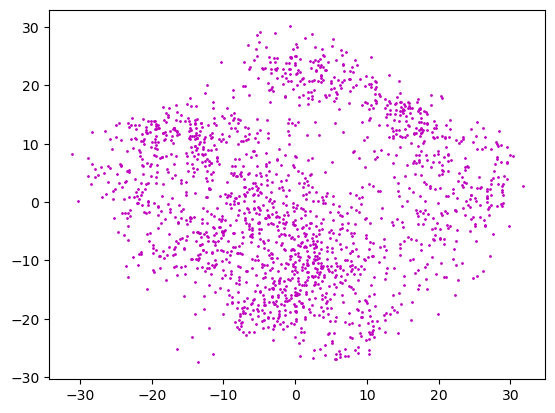

In [7]:
plt.plot(pca_data[:, 0], pca_data[:, 1], "m.", markersize=2)

<font color=darkred>Perform a Kmeans classification with ``n_digits`` classes</font>


In [10]:
from sklearn.cluster import KMeans
kmeans = KMeans(init="random", n_clusters=n_digits)
kmeans.fit(pca_data)

KMeans(init='random', n_clusters=10)

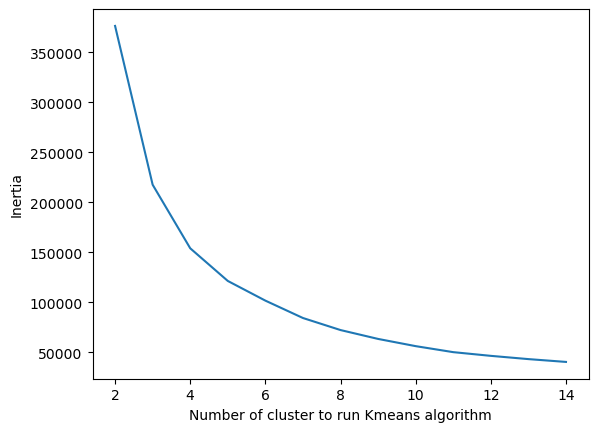

In [14]:
inertia = {}
for k in range(2, 15):
    kmeans = KMeans(init="random",n_clusters=k, max_iter=1000).fit(pca_data)
    # The inertia criterion is the sum of distances of samples to their closest cluster center
    inertia[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(inertia.keys()), list(inertia.values()))
plt.xlabel("Number of cluster to run Kmeans algorithm")
plt.ylabel("Inertia")
plt.show()

``k-means++`` selects initial cluster centroids using sampling based on an empirical probability distribution of the data. This technique speeds up convergence. 